In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("cars.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_model     100 non-null    object 
 1   miles_driven  100 non-null    int64  
 2   age           100 non-null    int64  
 3   sales_price   100 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


<AxesSubplot:xlabel='miles_driven', ylabel='sales_price'>

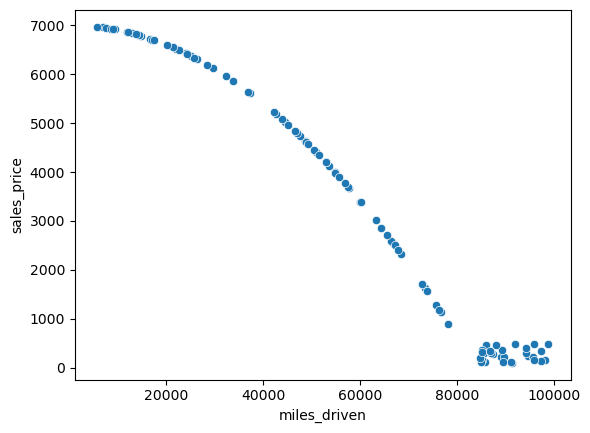

In [3]:
sns.scatterplot(data=df, x="miles_driven", y="sales_price")

In [4]:
df.loc[df[df['miles_driven'] <= 80000]['miles_driven'].idxmax()]

car_model       Honda Civic
miles_driven          78135
age                       4
sales_price      894.921775
Name: 28, dtype: object

In [5]:
df.loc[df['miles_driven'].idxmin()]

car_model       Nissan Altima
miles_driven             5797
age                         4
sales_price       6966.394791
Name: 33, dtype: object

In [6]:
def getPolyPrediction(xValue, aValue, intercept, shift):
    return aValue*(xValue + shift)**2 + intercept

def getRMSEAccuracy(df, aValue, intercept, xLabel, yLabel, shift):
    squared_errors = 0

    for i in range(len(df[yLabel])):
        dataY = df.iloc[i][yLabel]
        dataX = df.iloc[i][xLabel]
        prediction = getPolyPrediction(dataX, aValue, intercept, shift)
        
        # Calculate squared error and clip it
        squared_errors += (prediction - dataY)**2

    # Calculate mean squared error
    mean_squared_error = squared_errors / len(df[yLabel])

    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [7]:
def findOptimalPolyEquation(df, xLabel, yLabel, a_range, shift, intercept):
    best_a = None
    best_accuracy = float('inf')  # Initialize with a high value
    
    total_iterations = len(a_range)
    current_iteration = 0

    for aValue in a_range:
        accuracy = getRMSEAccuracy(df, aValue, intercept, xLabel, yLabel, shift)

        # Update the best values if the current accuracy is lower
        if accuracy < best_accuracy:
            best_a = aValue
            best_accuracy = accuracy

            print("Current A Value:", best_a)
            print("Current RMSE Accuracy:", best_accuracy)

        current_iteration += 1
        progress_percentage = (current_iteration / total_iterations) * 100
        print(f"Progress: {progress_percentage:.2f}%")

    return best_a, best_accuracy

def loopOptimalEquation(df, lastOptimalA, lastOptimalAIteration, xLabel, yLabel, shift, intercept):
    for i in range(1, 10):
        
        print("A Range: "+str(lastOptimalA-lastOptimalAIteration)+" "+str(lastOptimalA+lastOptimalAIteration))
        
        optimal_a, optimal_accuracy = findOptimalPolyEquation(df, 
                                                     xLabel, 
                                                     yLabel, 
                                                     np.arange(lastOptimalA-lastOptimalAIteration, lastOptimalA+lastOptimalAIteration, lastOptimalAIteration/10), 
                                                     shift,
                                                     intercept)
        
        lastOptimalAIteration =lastOptimalAIteration / 10
        lastOptimalA = optimal_a
        
        print("NEW Optimal A:", lastOptimalA)
        print("NEW Optimal RMSE Accuracy:", optimal_accuracy)

    print("FINAL Optimal A:", lastOptimalA)
    print("FINAL Optimal RMSE Accuracy:", optimal_accuracy)
    return lastOptimalA, optimal_accuracy

In [8]:
def findOptimalValues(df, xLabel, yLabel, aRange, shift, aIteration, intercept):
    optimal_a, optimal_accuracy = findOptimalPolyEquation(df, xLabel, yLabel, aRange, shift, intercept)

    print("START Optimal A:", optimal_a)
    print("START Optimal RMSE Accuracy:", optimal_accuracy)
    print("Starting Optimal Regression Loop...")

    return loopOptimalEquation(df, optimal_a, aIteration, xLabel, yLabel, shift, intercept)


In [9]:
optimal_a, optimal_accuracy = findOptimalValues(df, "miles_driven", "sales_price", np.arange(0.0000005, 0.0000015, 0.00000001), -5797, 0.00000001, 6966)

print("Optimal A Value:",str(optimal_a), "Optimal RMSE Accuracy:", str(optimal_accuracy))

Current A Value: 5e-07
Current RMSE Accuracy: 6476.996658236918
Progress: 0.99%
Progress: 1.98%
Progress: 2.97%
Progress: 3.96%
Progress: 4.95%
Progress: 5.94%
Progress: 6.93%
Progress: 7.92%
Progress: 8.91%
Progress: 9.90%
Progress: 10.89%
Progress: 11.88%
Progress: 12.87%
Progress: 13.86%
Progress: 14.85%
Progress: 15.84%
Progress: 16.83%
Progress: 17.82%
Progress: 18.81%
Progress: 19.80%
Progress: 20.79%
Progress: 21.78%
Progress: 22.77%
Progress: 23.76%
Progress: 24.75%
Progress: 25.74%
Progress: 26.73%
Progress: 27.72%
Progress: 28.71%
Progress: 29.70%
Progress: 30.69%
Progress: 31.68%
Progress: 32.67%
Progress: 33.66%
Progress: 34.65%
Progress: 35.64%
Progress: 36.63%
Progress: 37.62%
Progress: 38.61%
Progress: 39.60%
Progress: 40.59%
Progress: 41.58%
Progress: 42.57%
Progress: 43.56%
Progress: 44.55%
Progress: 45.54%
Progress: 46.53%
Progress: 47.52%
Progress: 48.51%
Progress: 49.50%
Progress: 50.50%
Progress: 51.49%
Progress: 52.48%
Progress: 53.47%
Progress: 54.46%
Progress: 5